In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from matplotlib import cm
import pandas as pd
import numpy.random as rdm
from mpl_toolkits.mplot3d import Axes3D
from numpy import meshgrid
data_path  = "/Users/asaaf/Desktop/Stage/"

plt.ion()
plt.clf()

plt.show()


<Figure size 640x480 with 0 Axes>

We load the data:

In [2]:
df = pd.read_csv(data_path+"sweden.txt", sep = '\t')
print(df)
dr = pd.read_csv(data_path+"Recovery_newbies.txt", sep = '\t')
print(dr)
dd = pd.read_csv(data_path+"Death.txt", sep = '\t')
print(dd)

    Suède: infective
0                  1
1                  1
2                  1
3                  1
4                  1
..               ...
77             18633
78             15878
79             16288
80             16903
81             16612

[82 rows x 1 columns]
    New_Recoveries
0                0
1                0
2                0
3                0
4                0
..             ...
77               0
78            3069
79               0
80               0
81             897

[82 rows x 1 columns]
    Death per day
0               0
1               0
2               0
3               0
4               0
..            ...
77           2679
78           2789
79           2854
80           2941
81           3040

[82 rows x 1 columns]


We don't want to have a dictionnary type.

In [3]:
I = df.values


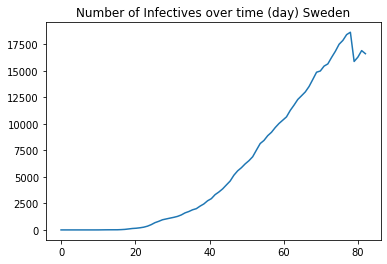

In [4]:
x = np.linspace(0,82,82)
plt.plot(x,I)
plt.title("Number of Infectives over time (day) Sweden")
plt.show()

Recover = recovered + dead (people who cannot give the virus to any susceptible)

We compute R

In [5]:
D = dd.values
R = dr.values

for i in range(81):
    R[i+1] = R[i] + R[i+1]
R = R + D
print(R)

[[   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   1]
 [   1]
 [   1]
 [   2]
 [   3]
 [   7]
 [   8]
 [  10]
 [  11]
 [  16]
 [  20]
 [  21]
 [  27]
 [  40]
 [  62]
 [  77]
 [ 105]
 [ 105]
 [ 110]
 [ 146]
 [ 180]
 [ 326]
 [ 395]
 [ 547]
 [ 562]
 [ 590]
 [ 666]
 [ 780]
 [ 876]
 [ 982]
 [1235]
 [1252]
 [1264]
 [1284]
 [1398]
 [1568]
 [1867]
 [1934]
 [2045]
 [2074]
 [2114]
 [2299]
 [2471]
 [2555]
 [2686]
 [3181]
 [3183]
 [3263]
 [3344]
 [3451]
 [3575]
 [3642]
 [3658]
 [3668]
 [6847]
 [6912]
 [6999]
 [7995]]


S_0 = Population totale de Suède en 2020

In [6]:
S_0 = 10183175


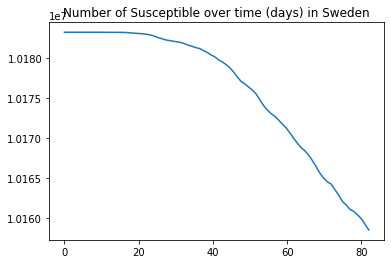

In [7]:
S = S_0 - I - R
x = np.linspace(0,82,82)
plt.plot(x,S)
plt.title("Number of Susceptible over time (days) in Sweden")
plt.show()

Text(0.5, 1.0, 'Error')

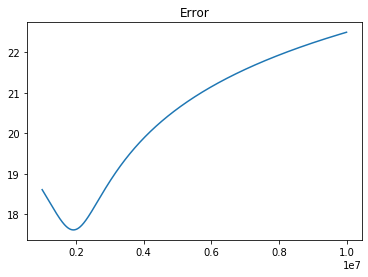

In [8]:

alpha = np.linspace(10**(6),10**(7),10000)
alpha = np.array(alpha)
error = np.ones(10000)
for i in range(10000):
    error[i] = np.linalg.norm((I - (-S + alpha[i]*np.log(S)  + S_0 - alpha[i]*np.log(S_0) +1 )),2)**2
plt.plot(alpha,np.log(error))
plt.title("Error")

Function to find the index where the minimum is in a vector:

In [9]:
def IndiceMinimum(liste):
    mini = liste[0]
    longueur=len(liste)
    indice_min = 0
    for i in range(longueur):
        if liste[i] <= mini:
            mini = liste[i]
            indice_min = i
    return indice_min


In [10]:
alpha_perf = (alpha[IndiceMinimum(error)])
print("Index minimum = ", IndiceMinimum(error))
print("alpha is then ", alpha_perf)
print("The error is equal to ", error[IndiceMinimum(error)])
print("R_0 is estimated to be equal to", (1/alpha[IndiceMinimum(error)])*S_0 )

rho = 1/alpha[IndiceMinimum(error)]
alpha_perf = alpha[IndiceMinimum(error)]

Index minimum =  1026
alpha is then  1923492.3492349235
The error is equal to  44787455.90784308
R_0 is estimated to be equal to 5.2941073584464196


From the theory, r/a = 1/alpha. We can see that the error is pretty important still $(4.5x10^{7})$ which is why the $R_0$ approximately 5.3 is still too big ($R_0$ is evaluated to be in between 2 and 3 for the Covid 19).

Text(0.5, 1.0, 'Curve fitting to estimate $R_0$')

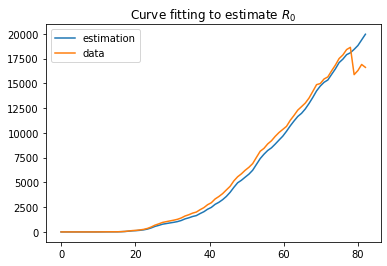

In [11]:
plt.plot(x,-S + np.log(S)*alpha[IndiceMinimum(error)]+ S_0 - alpha[IndiceMinimum(error)]*np.log(S_0) +1,label="estimation")
plt.plot(x,I, label="data")
plt.legend()
plt.title("Curve fitting to estimate $R_0$")

I found studies saying that $R_0$ in Sweden is equal to (approximately) 1.4  if we consider the data from 1st of April til the 25th.
Let's check it.

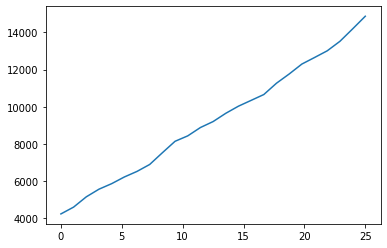

In [12]:

I_test = I[44:69]
S_test = S[44:69]
y = np.linspace(0,25,25)
plt.plot(y,I_test)

R_0 is estimated to be equal to [5.2314254]


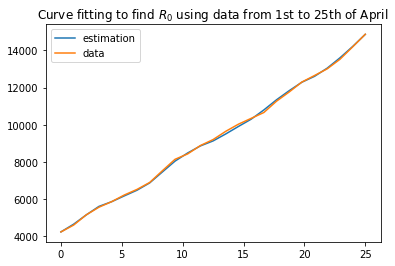

In [13]:
S_0 = S_test[0]
beta = np.linspace(9*10**(5),10**(7),10000)
beta = np.array(beta)
error_t = np.ones(10000)
for i in range(10000):
    error_t[i] = np.linalg.norm((I_test - (-S_test + beta[i]*np.log(S_test)  + S_0 - beta[i]*np.log(S_0) +I_test[0] )),2)**2
print("R_0 is estimated to be equal to",(1/beta[IndiceMinimum(error_t)])*S_0)

plt.plot(y,-S_test + 1945694*np.log(S_test)  + S_0 - 1945694*np.log(S_0) +I_test[0],label="estimation" )
plt.plot(y,I_test,label="data")
plt.title("Curve fitting to find $R_0$ using data from 1st to 25th of April")
plt.legend()


Again, we find a R_0 close to 5.2 that fits perfectly the curve. Why is it so different from 1.1? 


I want to check if the $R_0$ I found is reasonnable, so I apply another curve fitting:
    $\frac{dS}{dR} = -\frac{r}{a}S.$
    Hence $S(t) = S_0exp^{-R(t)\frac{r}{a}}.$
We can do a curve fitting to estimate $\frac{r}{a}$ and thus $R_0$.

R_0 is estimated to be equal to [3.54785186]


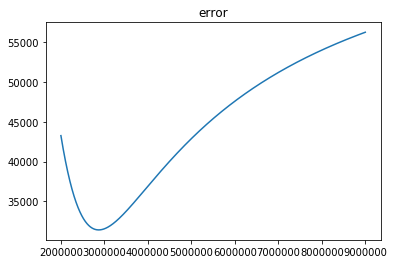

In [14]:

gamma = np.linspace(2*10**(6),9*10**(6),15000)
gamma = np.array(gamma)
error = np.ones(15000)
for i in range(15000):
    approx = S_0*np.exp(-R/gamma[i])
    error[i] = np.linalg.norm((S - approx),2)

plt.plot(gamma,error)
plt.title("error")
est_2 = IndiceMinimum(error)
print("R_0 is estimated to be equal to", (1/gamma[est_2])*S_0)

The $R_0$ estimated is then 3.6.
Let's compare those two estimations.

Text(0.5, 1.0, 'Estimation of S using different approximation techniques')

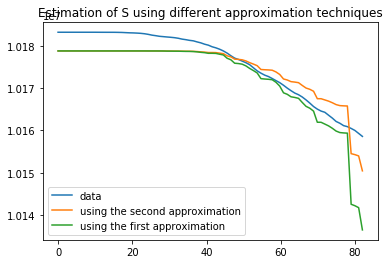

In [15]:
plt.plot(x,S,label="data")
plt.plot(x,S_0*np.exp(-R/gamma[est_2]),label = "using the second approximation")

plt.plot(x,S_0*np.exp(-R/1920792),label = "using the first approximation")
plt.legend()
plt.title("Estimation of S using different approximation techniques")

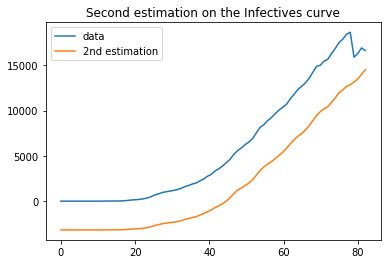

In [16]:
plt.plot(x,I, label="data")
plt.plot(x,-S + np.log(S)*gamma[est_2]+ S_0 - gamma[est_2]*np.log(S_0) +1,label="2nd estimation")
plt.title("Second estimation on the Infectives curve")
plt.legend()

The second estimation doesnt really fit to the infectives curve.

# A. EULER Method

Now, we try to estimate a and r using Euler Method.


We build the numerical solutions $S_{seq}, I_{seq}, R_{seq}$ using the formulas from the theory using $\Delta t = 1$.
From reading different articles, we have an idea of the intervals where $r$ and $a$ lie.
The error vector is then a matrix because we compute the error for every pair of $r$ and $a$ in the intervals chosen and we then take the couple that minimizes the error.

Since I feel that this way of estimating r and a is very approximative if I do it at the same time (I tried and the error is reaaaaally big). I was wondering if maybe
it wouldn't be better to try to estimate r and then find the corresponding a with the r/a that fits 
the data we found earlier. I compute it here:

In [17]:
S_seq = np.zeros(82)
R_seq = np.zeros(82)
I_seq = np.zeros(82)
S_seq[0] = S_0
R_seq[0] = 0
I_seq[0] = 1
r = np.linspace(10**(-8),9*10**(-8),10000)
r  = np.array(r)
error_seq = np.ones(10000)

for n in range(10000):
    a = alpha_perf*r[n]
    for i in range(81):
        S_seq[i+1] = S_seq[i] - r[n]*S_seq[i]*I_seq[i]
        I_seq[i+1] = I_seq[i] + r[n]*S_seq[i]*I_seq[i] - a*I_seq[i]
        R_seq[i+1] = R_seq[i] + a*I_seq[i]
    error_seq[n] = np.linalg.norm((I - I_seq),2)**2
print("index of minimum =", IndiceMinimum(error_seq))
print("index of minimum =", np.argmin(error_seq))
j = IndiceMinimum(error_seq)


index of minimum = 747
index of minimum = 747


In [18]:
a = (alpha_perf)*r[j]
print(a)
print(1/a)
print(r[j])


0.030730863365364444
32.54057616640413
1.597659765976598e-08


Text(0.5, 1.0, 'infective: estimation vs data')

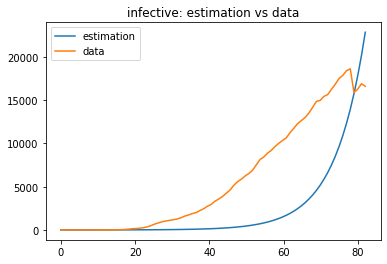

In [25]:
S_0 = 10183175
S_seq_perf = np.zeros(200)
R_seq_perf = np.zeros(200)
I_seq_perf = np.zeros(200)
S_seq_perf[0] = S_0
R_seq_perf[0] = 0
I_seq_perf[0] = 1
for i in range(199):
    S_seq_perf[i+1] = S_seq_perf[i] - r[j]*S_seq_perf[i]*I_seq_perf[i]
    I_seq_perf[i+1] = I_seq_perf[i] + r[j]*S_seq_perf[i]*I_seq_perf[i] - a*I_seq_perf[i]
    R_seq_perf[i+1] = R_seq_perf[i] +a*I_seq_perf[i]
I_predict = I_seq_perf[:82,]
plt.plot(x,I_predict, label="estimation")
plt.plot(x,I,label="data")
plt.legend()
plt.title("infective: estimation vs data")


This proves that the SIR model doesn't fit with the reality that much.. Or maybe we accumulated to
much error (since we use a first estimation to estimate something else..). The SIR-model seems to simple to predit the spread of a disease.
We can use this to make predictions though.. 

Text(0.5, 1.0, 'Predictions for the following days')

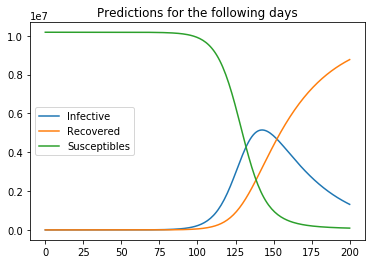

In [30]:
y = np.linspace(0,200,200)
plt.plot(y,I_seq_perf,label ="Infective")
plt.plot(y,R_seq_perf,label = "Recovered" )
plt.plot(y,S_seq_perf, label ="Susceptibles")
plt.legend()
plt.title("Predictions for the following days")

The predictions seems a bit too high for me (it reaches 5M people i.e half of the Swedish population infected by the virus).
It gives a good idea on the dynamic of the epidemic ( reaches a maximum and then goes down).
SIR seems to be a good model to use when the parameters a and r are known. The errors are quite big when we use it to estimate them though.
It is not realistic enough. 